# Matplotlib & Scipy exercises

## $\mu$-exercises
### 0: Numpy refresher
Use numpy to compute numerically the integral $ \int_0^\pi \sin(x) dx $.
Proceed as follow:

* Create a numpy array with the $x$ values ranging from 0 to $\pi$ using a step size `step`.
* Compute the values of $y = \sin(x)$.
* Compute the integral as the sum of all $y$ values multiplied by the step size.

This makes use of the following:

$$ \lim_{\Delta x \rightarrow 0} \sum_{i=0}^{\lfloor \pi / \Delta x \rfloor} \sin(\pi  i / n) \cdot \Delta x = \int_0^\pi \sin(x) dx$$

Don't write any loops, use the following numpy functions: `np.arange`, `np.sin`, `np.sum`

In [11]:
import numpy as np
import math

step = 0.001
x = np.array([i*step for i in range(0,int(np.pi/step))])
y = np.sin(x[:])
integral = np.sum(y[:]*step)


print(f'integral = {integral}')
print(f'error = {abs(integral-2):0.50f}')

integral = 1.999999361387434
error = 0.00000063861256593966686523344833403825759887695312


### 1: Interactive plot with Matplotlib

When plotting with Matplotlib in a Jupyter notebook the plot is embedded as a static image in the notebook. However, Matplotlib allows plots to be interactive, i.e. not just static images. To achieve this, copy the code of the example plot in the lecture into a separate file `example_plot.py` and then run this script from the terminal with the command `python3 example_plot.py`.

A window with the plot should appear showing the same plot as in the lecture example. This time, however, the plot is interactive, e.g. can be shifted and zoomed.

### 2: Plot a circle

Use matplotlib to plot the shape of a circle. The circle shall be parametrized by a parameter `t` such that `x` and `y` points can be computed as follows:

$$ x(t) = \cos(t) $$
$$ y(t) = \sin(t) $$

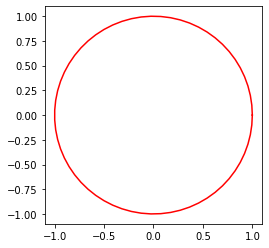

In [1]:
import matplotlib.pyplot as plt
import numpy as np


# Use np.linspace to create values for t ranging from `0` to `2*np.pi`
t = np.linspace(0, 2*np.pi, num=64)
x = np.cos(t[:])
y = np.sin(t[:])
plt.plot(x,y,color="red")
# TODO: Compute x and y
# Then create a XY plot of x and y

# Write the solution here.



# Set aspect ratio of x and y axis.
ax = plt.gca() # Get a handle to the axis.
ax.set_aspect(1)

plt.show()


### 3: Run an example from the gallery

Pick an example of your choice from the matplotlib gallery (https://matplotlib.org/gallery.html), copy the code and paste it here.

For instance this example illustrates how to make *sub-plots*: https://matplotlib.org/examples/subplots_axes_and_figures/subplot_demo.html

**Caveat**: *Don't blindly run code copied from the internet* in general. First have a quick look at it and make sure it is not doing anything suspicious. Code executed in this Jupyter notebook can gain full control over your computer and could potentially do harm. Code from the matplotlib gallery should be trustworthy.

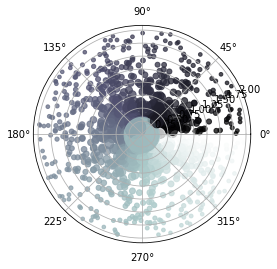

In [38]:
"""
==========================
Scatter plot on polar axis
==========================

Demo of scatter plot on a polar axis.

Size increases radially in this example and color increases with angle
(just to verify the symbols are being scattered correctly).
"""
import numpy as np
import matplotlib.pyplot as plt


# Compute areas and colors
N = 1000
r = 2 * np.random.rand(N)
theta = 2 * np.pi * np.random.rand(N)
area = 60 * 1/(r+0.2)**2
colors = theta

ax = plt.subplot(111, projection='polar')
c = ax.scatter(theta, r, c=colors, s=area, cmap='bone', alpha=0.75)


# Exercise 1 - `scipy.optimize`
Implement your own version of `scipy.optimize.curve_fit` by using the `scipy.optimize.minimize` function!

Measurement points `xdata` and `ydata` are given. Now the parameters of the function $ f(x) = b \exp(a x)+c $ should be fitted to match the measurement points such that the sum of squared errors is minimzed.

Use `scipy.optimize.minimize` to find `parameters` such that the follwing sum is minimized:

$$ error(parameters) =\sum (y_i - f(x_i, parameters) )^2 $$

Where $y_i$ and $x_i$ are the measurement points.


Optimization terminated successfully.
a = 0.6932589025685931, b = 0.5037320369207315, c = 0.9508193155664775


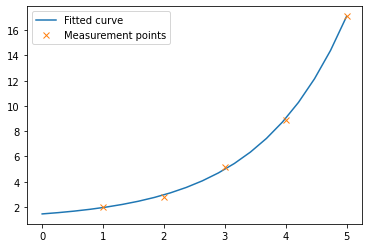

In [99]:
import scipy.optimize
import numpy as np

# Measurement data.
xdata = np.array([1, 2, 3, 4, 5])
ydata = np.array([2.0, 2.8, 5.2, 8.9, 17.1])

# Curve to be fitted.
def f(x,parameters):
    a, b, c = parameters
    return b*np.exp(x*a)+c

# STUDENT TASK

# Find parameters for `f` that minimize the sum of the squared errors.
# Define the 'error' function which computes the sum of squared errors.
# Then use `scipy.optimize.minimize` to find the optimal parameters that minimize the value of the error function.
# Also an initial guess `x0` for the minimization function must be provided.

# Write the solution here.

""""""""def error(parameters):
    total = 0
    for i in range(len(ydata)):
        total += (ydata[i]-f(xdata[i],parameters))**2
    return total

initialguess= [1,1,1]
result = scipy.optimize.minimize(fun = error,x0 = initialguess, tol = 0.0001) #is changing the tol cheating? :)
""""""""
# END OF STUDENT TASK

# Print optimization result message.
print(result.message)


# Plot the results if the optimization was successful.
if not result.success:
    print("Optimization failed!")
else:
    a, b, c = result.x
    print(f'a = {a}, b = {b}, c = {c}')
    x = np.linspace(0, 5, num=20)
    y = f(x, [a, b, c])
    
    # Plot the fitted curve together with the measurements.
    import matplotlib.pyplot as plt
    plt.plot(x, y, label='Fitted curve')
    plt.plot(xdata, ydata, 'x', label='Measurement points')
    plt.legend()
    plt.show()


# Exercise 2 - `scipy.integrate`

Exponential growth is usually described by a differential equation like $ \dot{y} = ay~$  (where $\dot{y}$ is the time derivative of $y$). In nature growth of populations is often not perfectly exponential but saturates at some point. This is also called *logistic growth* and can be described by a slightly different equation:

$$ y(t_0) = y_0 $$
$$ \dot{y} = a y (1 - y/b) $$

Where $a$ specifies the natural growth rate, i.e. the growth rate if there would be no saturation effects, and $b$ determines the saturation level.

## 2.1
Find and plot numerical solutions to the logistic growth equation for 

$$ y_0 = 1 $$
$$ a = 1 $$
$$ b \in [1, 11, 21, ..., 91] $$

and $t$ ranging from 0 to 10.

Text(0, 0.5, '$y(t)$')

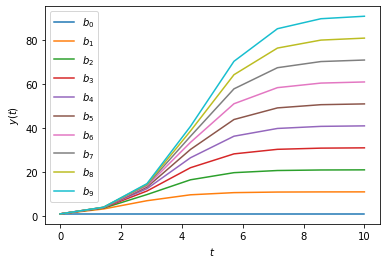

In [2]:
import numpy as np
import scipy.integrate 
import matplotlib.pyplot as plt

# Hint: Use `solve_ivp` to solve this initial value problem.

def logistic_growth_rate(t, y, a, b):
    return a*y*(1-y/b)

# Set the initial values of of the state variable y.
y0 = [1]

t_start = 0
t_end = 10
a=1
b=[(i)*10+1 for i in range(0,10)]

num_output_samples = 8 # Enlarge this for a smoother plot.
t_eval = np.linspace(t_start, t_end, num_output_samples)

sol = []
for i in range (len(b)):
    sol.append(scipy.integrate.solve_ivp(logistic_growth_rate, [t_start, t_end], y0, t_eval=t_eval,args = (a,b[i])))

for j in range (len(b)):
    for i, y in enumerate(sol[j].y):
        plt.plot(sol[j].t, y, label=f'$b_{j}$')

# Format the plot.
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

## 2.2 Lotka–Volterra equation (optional):
Consider a population of rabbits and a population of foxes. Growth is described for both by the equation from above, except that now the two populations are coupled: Rabbits are eaten by the foxes which leads to the term $ - c y_r y_f$ and the grows rate of foxes is proportional to the size of the rabbit population. Foxes die with a rate $e$.
$$ y_r(t_0) = y_{r0} $$
$$ y_f(t_0) = y_{f0} $$
$$ \dot{y_r} = a y_r (1 - y_r/b) - c y_r y_f$$
$$ \dot{y_f} = d  y_r  y_f - e y_f $$

Compute and plot numerical solutions of the population sizes for different initial values.


In [ ]:
import numpy as np
import scipy.integrate
import matplotlib.pyplot as plt

# Hint: Use `solve_ivp` to solve this initial value problem.

# Use this parameters:
# (Values taken from http://math.smith.edu/~callahan/cic/ch4.pdf section 4.1)
a = 0.1   # Growth rate of rabbit population.
b = 10000 # Saturation level of rabbit population.
c = 0.005 # Eat-rate per rabit*fox.
d = 0.00004  # Growth rate of fox population.
e = 0.04  # Fox death rate.

# Set the initial values of of the state variable y.
# Start with 20 rabbits and 10 foxes.
y0 = [20, 10]

# Time span of simulation.
t_start = 0
t_end = 1000

# Write the solution here.


# Plot the results.

plt.plot(sol.t, sol.y[0], label='Rabbits')
plt.plot(sol.t, sol.y[1], label='Foxes')

# Format the plot.
plt.legend()
plt.xlabel('$t$')
plt.ylabel('$y(t)$')

# Exercise 3: `scipy.signal`

This exercise will walk you through how to record and play audio signals using `PyAudio`. The essential part is the processing of this audio signal. For this example the Fast Fourier Transform (FFT) shall be used to implement a low-pass filter in the frequency domain.

* `pyaudio` must be installed first. (In a terminal run `pip install pyaudio` or `conda install pyaudio` or `apt-get install python3-pyaudio`)

First a piece of audio has to be recorded. Make sure you have the microphone enabled.

In [115]:
# Record an audio signal from the microphone.

import numpy as np
import pyaudio

# Create an instance of PyAudio.
audio = pyaudio.PyAudio()

# Audio settings.
sample_rate = 16000
num_channels = 1 # Use only one channel.
audio_format = pyaudio.paInt16 # Use 16-bit signed integers.

# Open an audio input stream.
stream_in = audio.open(format=audio_format,
                       channels=num_channels,
                       rate=sample_rate,
                       input=True)

duration = 2.0 # Recording duration in seconds.
print(f"Start recording for {duration} seconds...")
audio_data = stream_in.read(int(sample_rate * duration))
print("done")

# Convert the audio data in a numpy array.
dtype = np.dtype(np.int16).newbyteorder('<')
signal = np.frombuffer(audio_data, dtype=dtype).astype(np.float)


Start recording for 2.0 seconds...
done


The following plots the time domain signal together with a spectrogram.

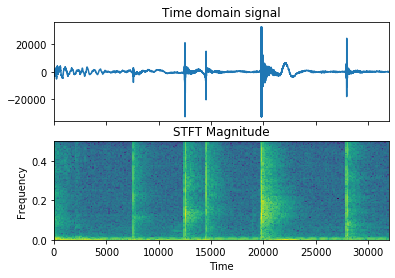

In [116]:
# Plot the recorded audio signal together with the spectrum.

import scipy.signal
import matplotlib.pyplot as plt

def plot_signal(signal: np.ndarray):
    """
    Plot the signal in time domain and time/frequency domain.
    """
    
    # Compute the 'STFT'.
    # This is similar to computing the FFT over a sliding window.
    # Here, this is only done for illustration.
    fs = 1
    f, t, Zxx = scipy.signal.stft(signal, fs, nperseg=256)
    magnitude = np.abs(Zxx)

    fig, (ax0, ax1) = plt.subplots(nrows=2, sharex=True)
    ax0.set_title('Time domain signal')
    ax0.plot(signal)

    ax1.pcolormesh(t, f, np.log(magnitude))
    ax1.set_title('STFT Magnitude')
    ax1.set_ylabel('Frequency')
    ax1.set_xlabel('Time')
    plt.show()
    
plot_signal(signal)

### Task 3.1
Implement a low-pass filter in frequency domain!

C:\Users\mathi\anaconda3\lib\site-packages\scipy\signal\spectral.py:1815: UserWarning: Input data is complex, switching to return_onesided=False
  warnings.warn('Input data is complex, switching to '
C:\Users\mathi\anaconda3\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)
C:\Users\mathi\anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in log


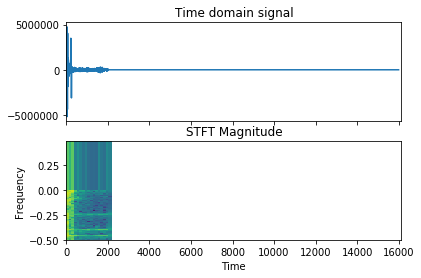

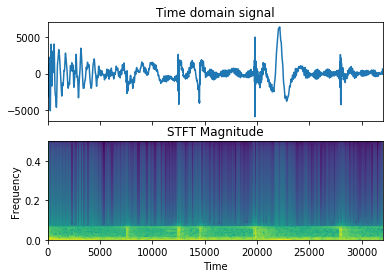

In [117]:

# Student task: Use the FFT to implement a low-pass filter.
# Hint: use `np.fft.rfft` to compute the FFT of a real-valued signal.
# Use `np.fft.irfft` to compute the inverse FFT. Use `np.real` to get the
# real part of a complex signal.
# Once the FFT is computed a low-pass filter can be implemented simply by 
# setting high frequencies to zero. Then the modified frequency-domain signal
# is converted back to time domain.
#
# Plot the absolute value (`np.abs`) of the FFT data before and after applying the filter
# to visualize the effect.

# By default don't do any processing.
# This has to be changed!

fourier_tranform = (np.fft.rfft(signal))
todo = fourier_tranform

for i in range(len(todo)):
    if (i>2000):
        todo[i] = 0

processed_signal = np.fft.irfft(todo)


# Plot the processed signal.
plot_signal(fourier_tranform)
plot_signal(processed_signal)


In [118]:
# Play back the audio.
def play_signal(signal: np.ndarray):
    stream_out = audio.open(format=audio_format,
                            channels=num_channels,
                            rate=sample_rate,
                            output=True)
    print("Play signal...")
    stream_out.write(signal.astype(np.int16), len(signal))
    print("done")

print("Play original signal.")
play_signal(signal)
print("Play processed signal.")
play_signal(processed_signal)

Play original signal.
Play signal...
done
Play processed signal.
Play signal...
done
